# **Checkpoint 1**

*Integrantes:*

Igor Fortaleza,

Larissa Cardomingo,

Rafael Lima,

Samara Machado,

Yuri Bertoldo




---


# *Algoritmo para classificação do dataset sobre imoveis.*

---



1.	Introdução
Neste trabalho iremos demonstrar um algoritmo de classificação utilizando um dataset sobre o mercado imobiliário e algumas bibliotecas como pandas, scikit-learn entre outras.


2.	Objetivo
Criar um algoritmo que classifique imóveis de acordo com informações que foram passadas pelo dataset.


3.	Bibliotecas

*   Pandas

De acordo com PANDAS (2018), pandas é uma biblioteca voltada para a manipulação de dados, oferece estruturas de dados e operações para manipular tabelas e ferramentas para tratar algoritmos e juntamente com o scikit-learn facilita a manipulação dos dados.

*   Scikit-learn

Scikit-learn é uma biblioteca de aprendizado de máquina de código aberto muito conhecida como sklearn e voltada principalmente para algoritmos de classificação, regressão e agrupamento e com uma integração com outras bibliotecas como NumPY e SciPy. (SCIKIT-LEARN, 2020).
Um dos recursos que usaremos em nosso trabalho e que o sklearn trabalha muito bem é o algoritmo de aprendizado supervisionado onde trataremos de modelos lineares generalizados.



*   Seaborn

Seaborn é uma biblioteca de visualização de dados e gráficos estatísticos. (SEABORN, 2018).

*   Métodos para métricas

F1 Score, de acordo com o SCIKIT-LEARN (2020), a métrica de F1 pode ser interpretada como uma média ponderada da precisão e da revocação, onde temos 1 como melhor e 0 como pior nota.





4.	Desenvolvimento

In [ ]:
#Bibliotecas importadas
import pandas as pd
import seaborn as sns

#normalização
from sklearn.preprocessing import StandardScaler

# Separação dos dados
from sklearn.model_selection import train_test_split

# Modelos utilizados
from sklearn.tree import DecisionTreeClassifier


# Métricas de avaliação
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [ ]:
#Importando os dados
df_test = pd.read_csv('https://raw.githubusercontent.com/prof-renato/data/main/test.csv')
df_train = pd.read_csv('https://raw.githubusercontent.com/prof-renato/data/main/train.csv')

In [ ]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,Mid Price
1,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,Mid Price
2,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,Mid Price
3,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,High Price
4,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,Mid Price


In [ ]:
#informações dos dados
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1148.000000,1148.000000,956.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1144.000000,1148.000000,...,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000
mean,735.014808,58.340592,67.922594,9844.210801,5.810976,5.615854,1966.096690,1981.358885,92.792832,421.716899,...,438.493031,86.468641,39.546167,24.147213,2.955575,13.380662,1.967770,47.250871,6.275261,2007.822300
std,419.831310,44.609747,23.094848,8561.928481,1.367190,1.161573,29.722669,21.006084,175.150943,449.279073,...,212.636768,124.108018,63.851646,61.277935,28.458611,50.715548,33.479682,546.719742,2.656934,1.321722
min,2.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,376.750000,20.000000,57.000000,7200.000000,5.000000,5.000000,1949.000000,1962.000000,0.000000,0.000000,...,297.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,735.500000,50.000000,65.000000,9076.500000,6.000000,5.000000,1967.000000,1982.000000,0.000000,359.000000,...,440.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1095.250000,75.000000,80.000000,11153.250000,7.000000,6.000000,1994.000000,2002.000000,132.000000,664.500000,...,546.500000,158.250000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,5644.000000,...,1418.000000,857.000000,523.000000,330.000000,508.000000,410.000000,648.000000,15500.000000,12.000000,2010.000000


In [ ]:
#vendo dados únicos
print(df_train.nunique())

Id               1148
MSSubClass         15
MSZoning            5
LotFrontage       100
LotArea           832
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice           3
Length: 81, dtype: int64


In [ ]:
#Verificando dados faltantes
df_train.isnull

<bound method DataFrame.isnull of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        2          20       RL         80.0     9600   Pave   NaN      Reg   
1        4          70       RL         60.0     9550   Pave   NaN      IR1   
2        6          50       RL         85.0    14115   Pave   NaN      IR1   
3        7          20       RL         75.0    10084   Pave   NaN      Reg   
4        8          60       RL          NaN    10382   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1143  1454          20       RL         90.0    17217   Pave   NaN      Reg   
1144  1455          20       FV         62.0     7500   Pave  Pave      Reg   
1145  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1146  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1147  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour 

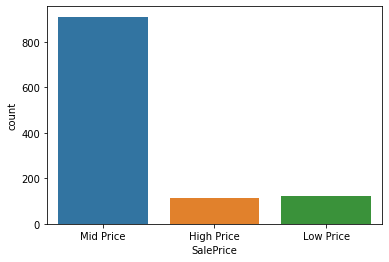

In [ ]:
sns.countplot(x='SalePrice', data=df_train)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


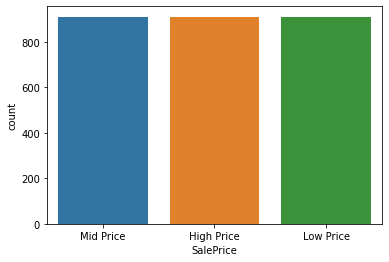

In [ ]:
#Balamcear aumentando (criando dados artificialmente) a base de label menor

from imblearn.over_sampling import RandomOverSampler

 #Random OverSampler -> Pegando valores aleatorios da base menor e criando copia
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(df_train.drop(columns=['SalePrice']), df_train['SalePrice'])
sns.countplot(y_ros)

In [ ]:
# Data Vis
from sklearn.preprocessing import StandardScaler, LabelEncoder
copy_df = X_ros.copy()

type_1_le = LabelEncoder()
LotArea_labels = type_1_le.fit_transform(copy_df['LotArea'])
PoolArea_labels = type_1_le.fit_transform(copy_df['PoolArea'])
GarageType_labels = type_1_le.fit_transform(copy_df['GarageType'])
LotFrontage_labels = type_1_le.fit_transform(copy_df['LotFrontage'])
MSZoning_labels = type_1_le.fit_transform(copy_df['MSZoning'])
YearBuilt_labels = type_1_le.fit_transform(copy_df['YearBuilt'])
CentralAir_labels = type_1_le.fit_transform(copy_df['CentralAir'])
FireplaceQu_labels = type_1_le.fit_transform(copy_df['FireplaceQu'])




copy_df['LotArea'] = LotArea_labels
copy_df['PoolArea'] = PoolArea_labels
copy_df['GarageType'] = GarageType_labels
copy_df['LotFrontage'] = LotFrontage_labels
copy_df['MSZoning'] = MSZoning_labels
copy_df['YearBuilt'] = YearBuilt_labels
copy_df['CentralAir'] = CentralAir_labels
copy_df['FireplaceQu'] = FireplaceQu_labels



copy_df = copy_df[['LotArea', 'PoolArea', 'GarageType', 'LotFrontage', 'MSZoning', 'YearBuilt', 'CentralAir', 'FireplaceQu']]

y = y_ros.copy()
y_label = type_1_le.fit_transform(y)
y = y_label

copy_df.head(10)

,LotArea,PoolArea,GarageType,LotFrontage,MSZoning,YearBuilt,CentralAir,FireplaceQu
0,428,0,1,48,3,77,1,4
1,421,0,5,28,3,19,1,2
2,735,0,1,53,3,94,1,5
3,471,0,1,43,3,105,1,2
4,503,0,1,100,3,74,1,4
5,121,0,5,19,4,35,1,4
6,192,0,1,18,3,42,1,4
7,573,0,5,38,3,66,1,5
8,630,0,3,53,3,106,1,2
9,689,0,5,100,3,63,1,5


In [ ]:
X = copy_df

# Divisão de treino e teste, sendo 20% das amostras para teste
x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                   random_state=42)

### Criando o modelo

In [ ]:
dtc = DecisionTreeClassifier() #instanciando árvore de decisão para classificação
model = dtc.fit(x_train, y_train) #criando modelo

### Avaliando o modelo

In [ ]:
y_pred = model.predict(x_test) #predizendo variáveis resposta

In [ ]:
accuracy_score(y_test, y_pred)

0.9139194139194139

In [ ]:
print(classification_report(y_test, y_pred)) #verificando métricas de avaliação

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       189
           1       0.92      1.00      0.96       176
           2       1.00      0.89      0.94       181

    accuracy                           0.96       546
   macro avg       0.97      0.96      0.96       546
weighted avg       0.97      0.96      0.96       546



In [ ]:
matriz_confusao = confusion_matrix(y_test, y_pred, labels=[0, 1]) # Cria a matriz de confusão
matriz_confusao

array([[189,   0],
       [  0, 176]])

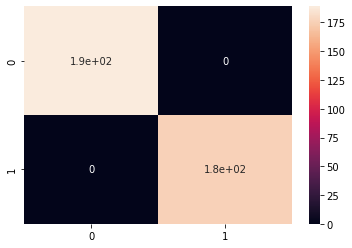

In [ ]:
sns.heatmap(matriz_confusao, annot=True) # Visualiza a matriz de confusão 

5.	Conclusão

Por causa do excesso de colunas com dados não numéricos e falta de explicação dos mesmos pelos responsáveis da criação do dataset não conseguimos chegar em nenhum valor expressivo para um trabalho pois estamos usando poucas variáveis. 


6.	Bibliografia

PANDAS. Python Data Analysis Library. [s. l.], 2018. Disponível em: https://pandas.pydata.org/index.html. Acesso em: 18 abr. 2022.

SCIKIT-LEARN. Machine Learning in Python. [s. l.], 2020. Disponível em: https://scikitlearn.org/stable/. Acesso em: 18 abr. 2022.

SEABORN. An introduction to seaborn. Disponível em: https://seaborn.pydata.org/introduction.html. Acesso em: 18 abr. 2022.
